# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 심화문제!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 일곱 번째 마을 '심화문제' 마을에 도착했습니다.
* 그럼, 지금부터 일곱 번째 드래곤볼을 찾아볼까요?

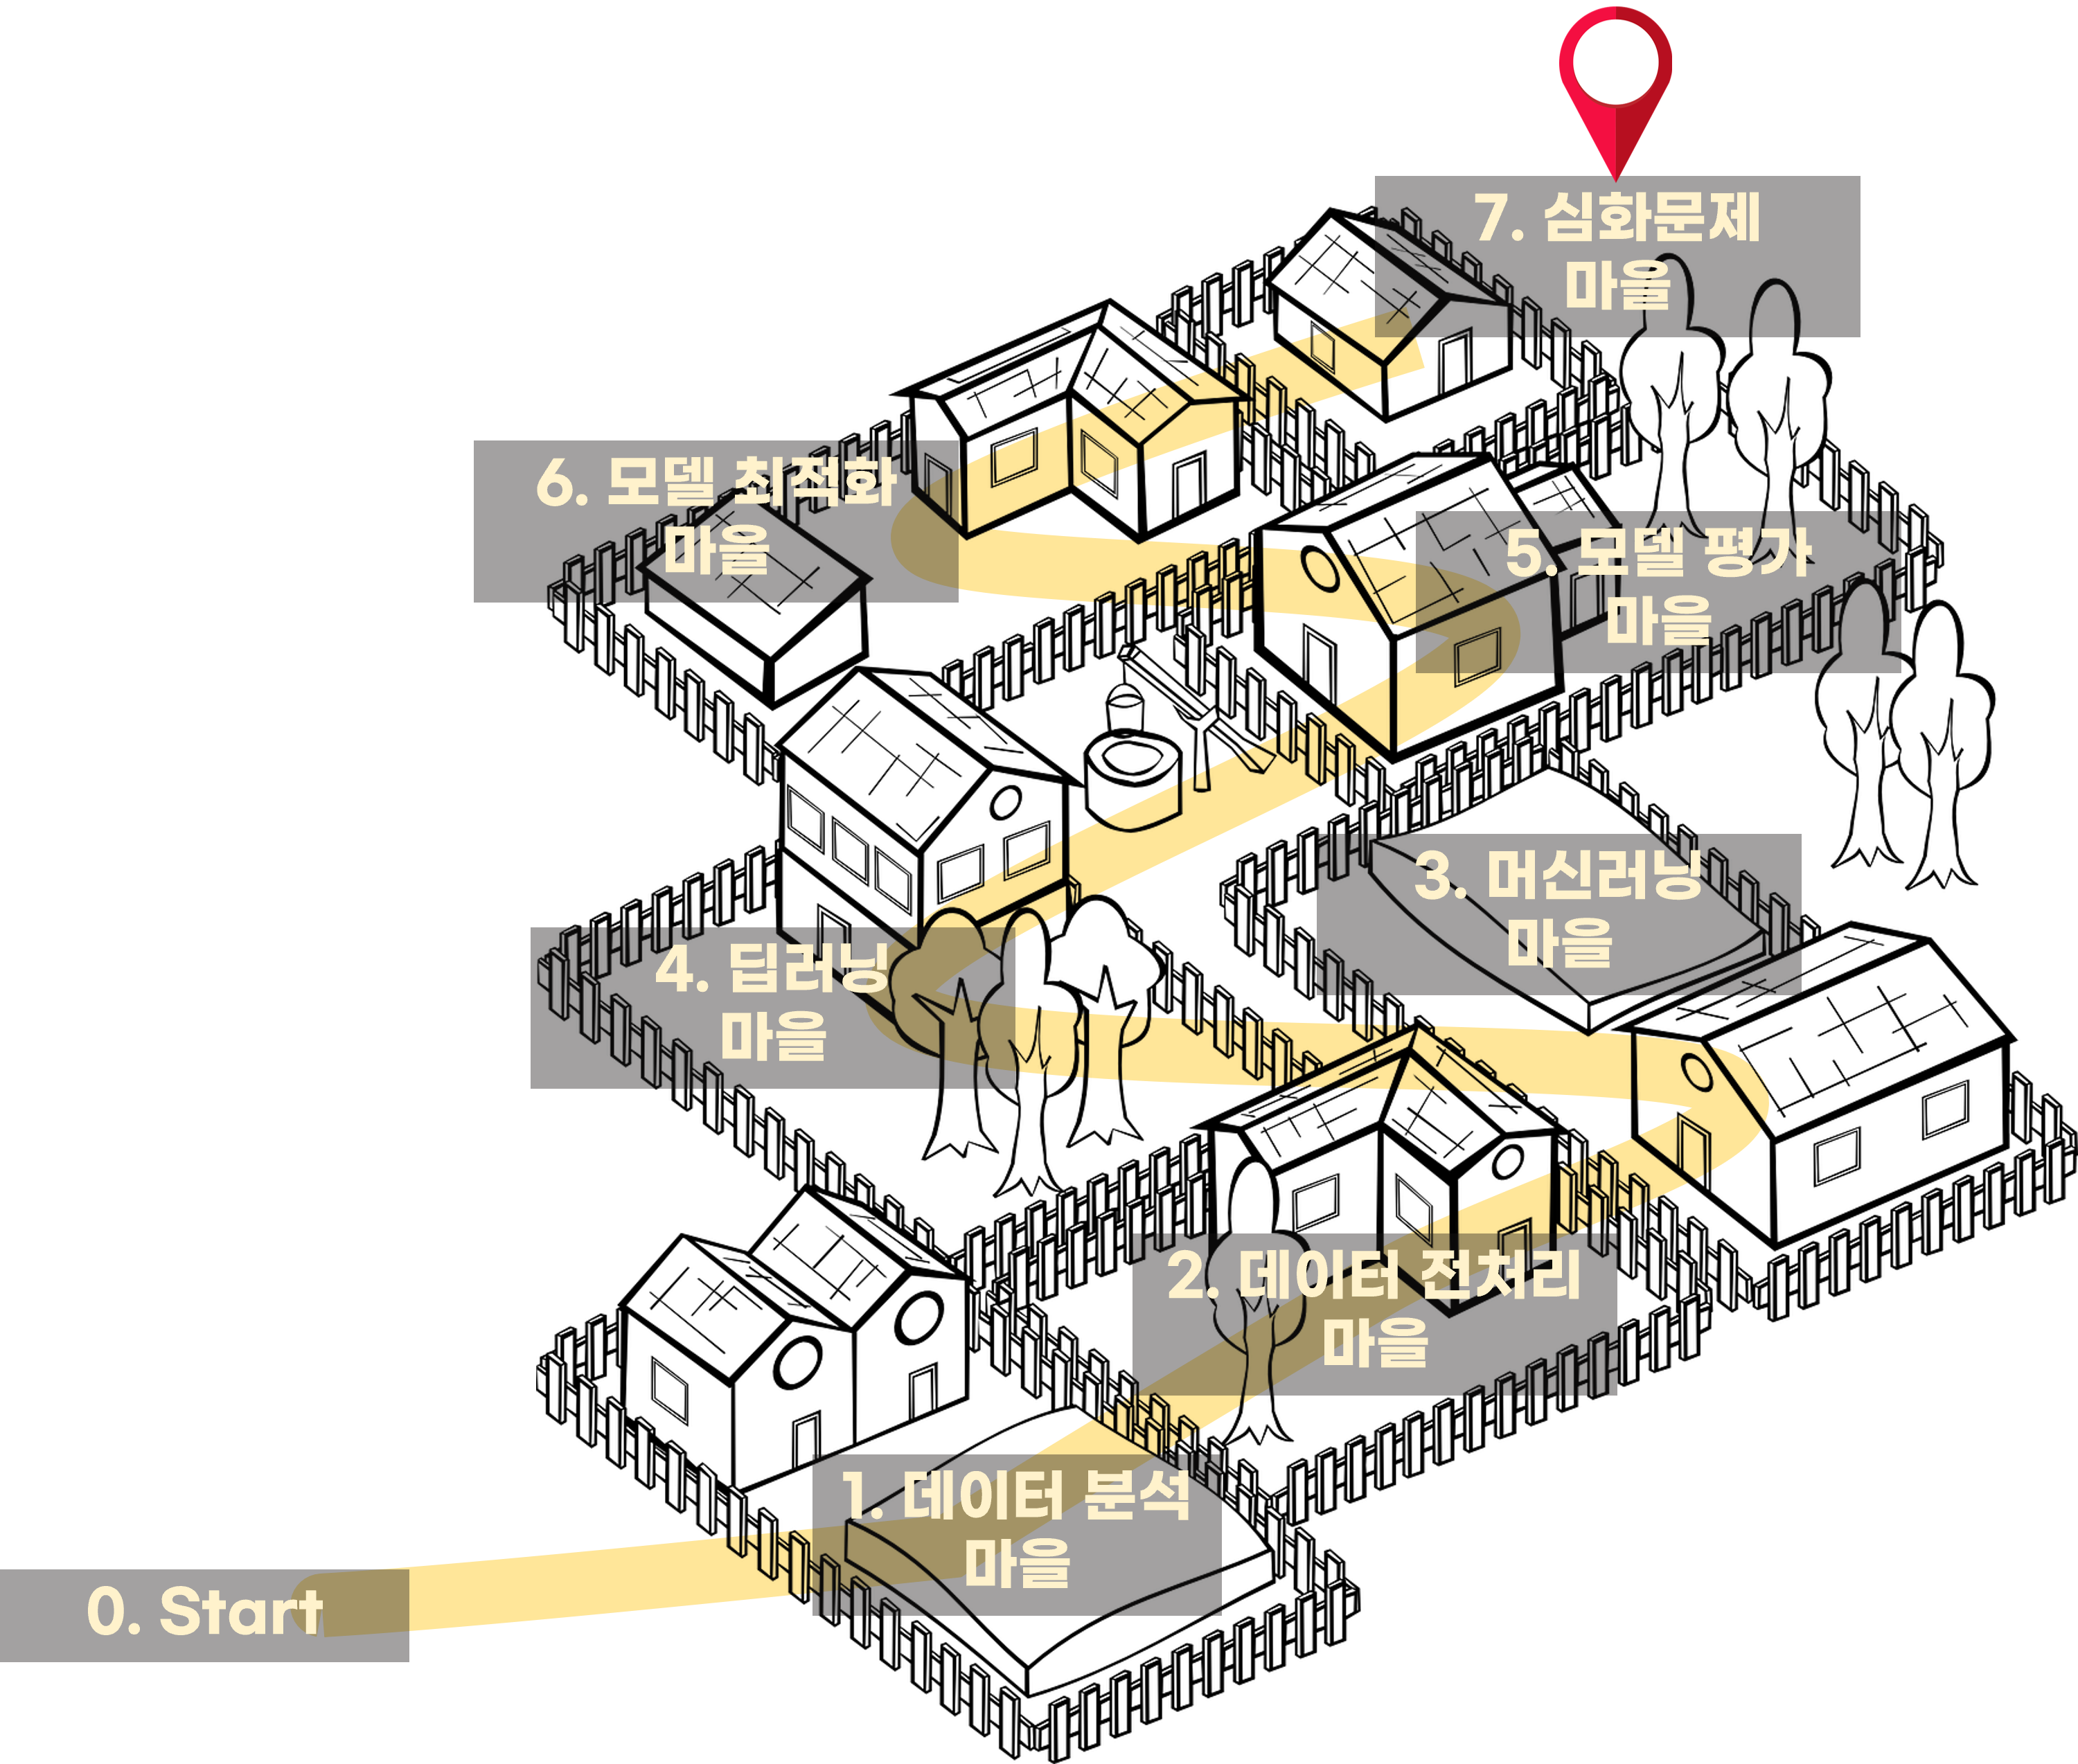

### [상황] 일곱 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn xgboost gspread oauth2client

In [ ]:
# ID를 입력해주세요.
ID = "finalTest"

---

# (실습준비) 데이터 불러오기부터

In [ ]:
import pandas as pd

# 학습/평가 데이터 로딩
df = pd.read_csv('raw_data/onenavi_train.csv',sep="|")
df_eval = pd.read_csv('raw_data/onenavi_evaluation.csv',sep="|")

# 데이터 합치기
df_total = pd.concat([df,df_eval])

# 학습/평가 데이터 로딩
df_feature = pd.read_csv("add_data/onenavi_train_feature.csv",sep="|")
df_target = pd.read_csv("add_data/onenavi_train_target.csv",sep="|")

# 학습/평가 데이터 로딩
df_evaluation_target = pd.read_csv("add_data/onenavi_evaluation_et.csv",sep="|")
df_evaluation_feature = pd.read_csv("add_data/onenavi_evaluation_feature.csv",sep="|")

In [ ]:
### Train/Test Data Split
from sklearn.model_selection import train_test_split

# train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size=0.20, random_state=42)

#### [실습문제1] 심화문제
* 랜덤포레스트를 활용해서 모델최적화를 하고 모델을 저장해주세요.
* 최적화된 모델은 6_model.pkl로 저장해주세요.
* 저장위치는 model 폴더입니다.
* 단서 : 비밀입니다. 모델만 저장하시면 자동으로 체크 예정이에요.

In [ ]:
# 아래에 실습코드를 작성하세요.
import numpy as np
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model=rfr(n_estimators=100,max_depth=5,min_samples_split=30,min_samples_leaf=15,random_state=42)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 모델을 저장합니다.
import joblib

joblib.dump(model, 'model/6_model.pkl') 

In [ ]:
# 단서1은 따로 적지 않으셔도 됩니다. 'model_6.pkl'로 저장만 하시면 자동으로 체크합니다.

#### [실습문제2] 심화문제
* Tensorflow를 활용해서 모델최적화를 하고 모델을 저장해주세요.
* 최적화된 모델은 DeeplearningModel_2.h5로 저장해주세요.
* 저장위치는 model 폴더입니다.
* 단서 : 비밀입니다. 모델만 저장하시면 자동으로 체크 예정이에요.

In [ ]:
# 아래에 실습코드를 작성하세요.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

# 모델 만들기 : 아주 간단한 모델

def build_model():
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_x.keys())]),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1)
            ])

    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae', 'mse'])
    return model

model = build_model()

In [ ]:
# 모델 학습
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # 조기종료 콜백함수 정의

checkpoint_path = 'model/tmp_checkpoint.ckpt'
cb_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, monitor='val_loss',
                               verbose=1, save_best_only=True) # 체크포인트 저장

history = model.fit(train_x, train_y, epochs=30,  
                   validation_data = (test_x,test_y),
                    callbacks=[cb_checkpoint, early_stopping]
                    )

In [ ]:
# 아래에 실습코드를 작성하세요.
model.load_weights(checkpoint_path)
model.save("model/DeeplearningModel_2.h5")

In [ ]:
# 단서2는 따로 적지 않으셔도 됩니다. 'DeeplearningModel_2.h5'로 저장만 하시면 자동으로 체크합니다.

---

### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 찾았습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [ ]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.seventhModule(ID)

In [ ]:
# 확인
from IPython.display import Image
Image("./dragonball/7성구.png", width=300, height=300)